In [138]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [140]:
#Check whether DataFrame having Duplicated Rows or not

df.duplicated().sum()


0

In [141]:
#Check whether DataFrame having Missing Values

df.isna().sum()


Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [142]:
# Droping the un-necessary columns

df.drop(columns=["Unnamed: 0"],inplace=True)


In [143]:

# In Ram column replace GB with nothing

df["Ram"] = df["Ram"].str.replace("GB","")

In [144]:
# In Weight column replace Kg with nothing
df["Weight"] = df["Weight"].str.replace("kg","")

In [145]:
#Converting the Data Type of Ram to int32 And Weight to float32
df["Ram"] = df["Ram"].astype("int32")
df["Weight"] = df["Weight"].astype("float32")

UNIVARIATE ANALYSIS ON PRICE COLUMN

In [146]:
import seaborn as sns

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\708458291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


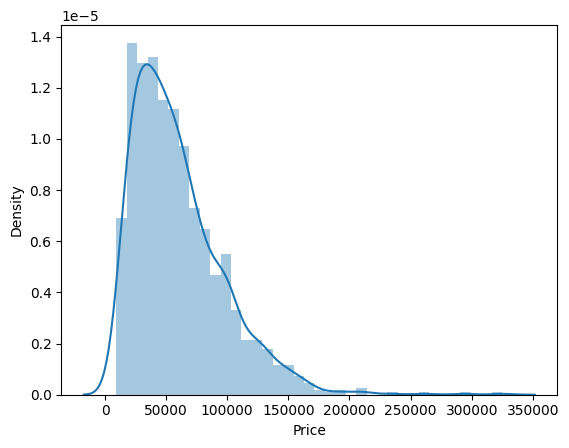

In [147]:
sns.distplot(df['Price'])
plt.show()

data is skewed to the right side

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64


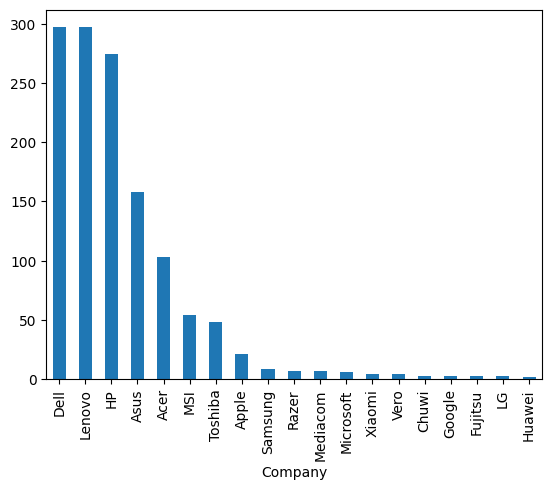

In [148]:
#Checking the number of Laptops of Each Company

print(df["Company"].value_counts())
df["Company"].value_counts().plot(kind="bar")
plt.show()

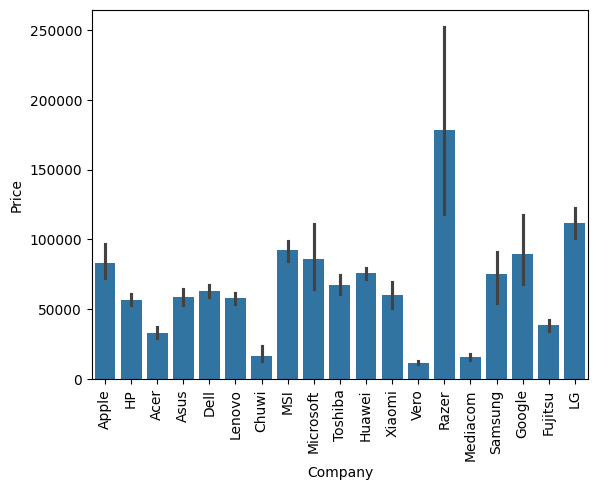

In [149]:
# Checking Average price of Each Brand
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


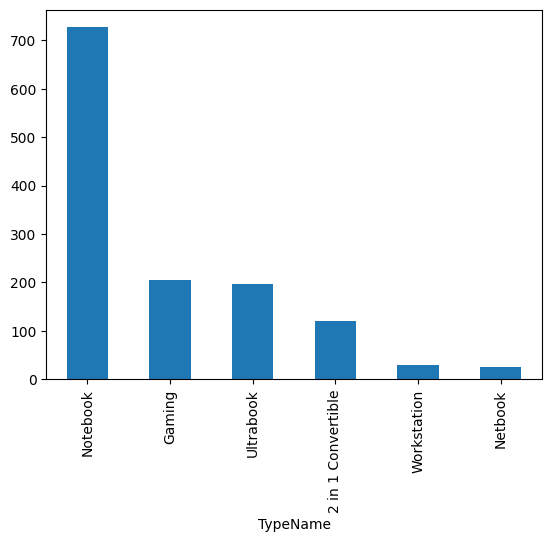

In [150]:

#Checking number of different types of  Laptops
df['TypeName'].value_counts().plot(kind="bar")
print(df["TypeName"].value_counts())

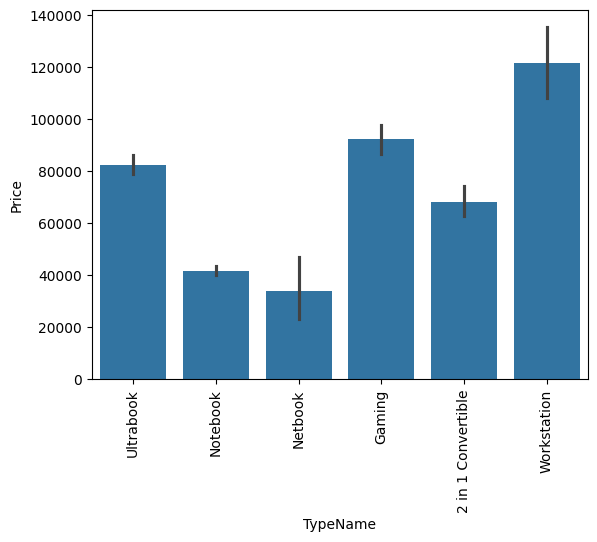

In [151]:
#Checking which type of Laptop having the highest price
sns.barplot(x = df["TypeName"], y= df["Price"])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\1678549884.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Inches"])


<Axes: xlabel='Inches', ylabel='Density'>

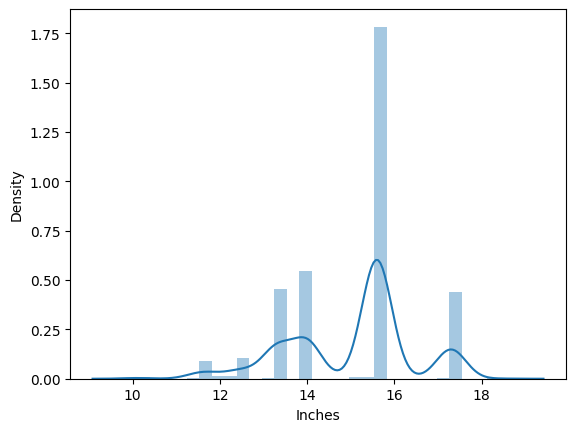

In [152]:
#Checking how the Inches column is distributed
sns.distplot(df["Inches"])

<Axes: xlabel='Inches', ylabel='Price'>

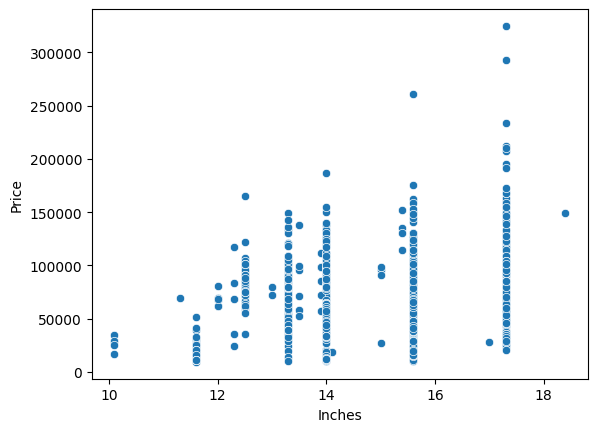

In [153]:

sns.scatterplot(x=df["Inches"],y=df["Price"])

In [154]:
#Checking How many different types of ScreenResolutions are present 
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [155]:
#Creating a new Column which will store the information that whether the laptop is touchscreen or not (1 if the laptop is touchscreen and 0 if the laptop is not touchscreen)
df["Touchscreen"] =  df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0 )

Touchscreen
0    1111
1     192
Name: count, dtype: int64


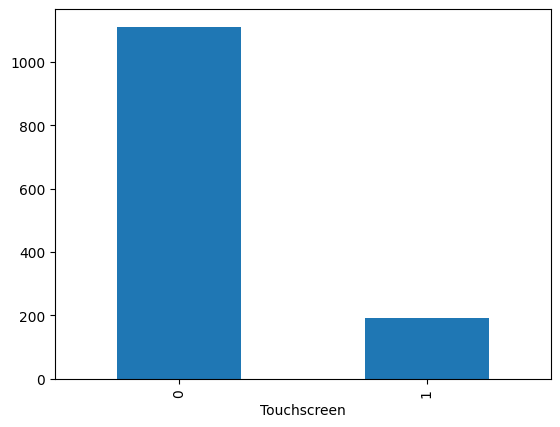

In [156]:
#Checking how many touchscreen laptops we have
df["Touchscreen"].value_counts().plot(kind="bar")
print(df["Touchscreen"].value_counts())

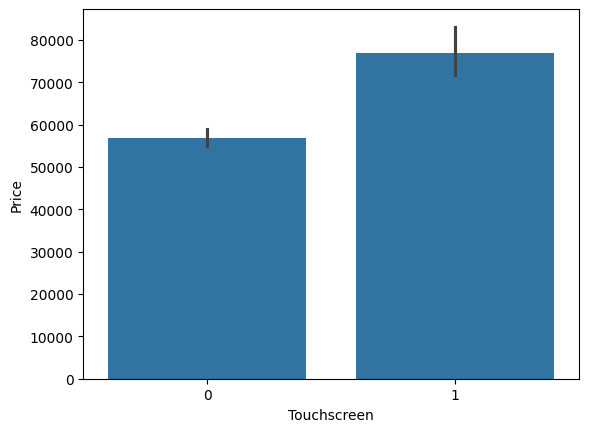

In [157]:
#Checking the price variation in between Touchscreen laptops and nonTouchscreen Laptops
sns.barplot(x=df['Touchscreen'],y=df["Price"])
plt.show()

In [158]:

#Creating a new column for the laptops with IPS Panel
df["IPS"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

IPS
0    938
1    365
Name: count, dtype: int64


<Axes: xlabel='IPS'>

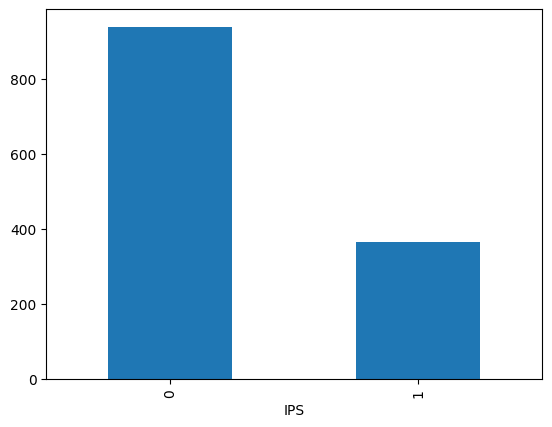

In [159]:
# Checking number of laptops with IPS panel
print(df["IPS"].value_counts())
df["IPS"].value_counts().plot(kind="bar")

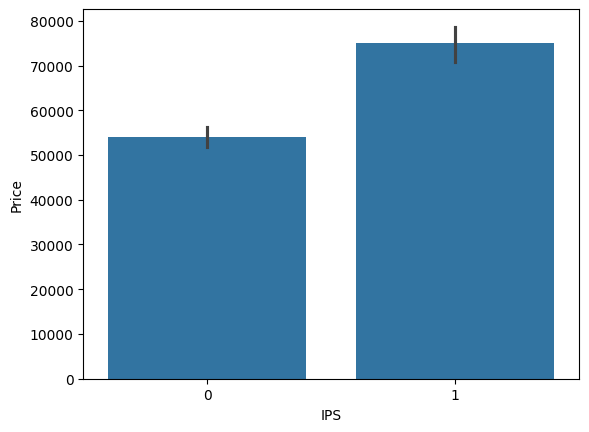

In [160]:

# Checking the price distribution of Laptops with IPS panel and withput IPS panel
sns.barplot(x=df['IPS'],y=df["Price"])
plt.show()

In [161]:
#Differentiating the X_resolution and Y_resolution from the column ScreenResolution 
new = df["ScreenResolution"].str.split("x",n=1,expand=True)

In [162]:
#Adding X_res and Y_res to the main DataFrame
df["X_res"] = new[0]
df["Y_res"] = new[1]

In [163]:
#Clearing all the data Other than X_resolution from X_res column
df["X_res"] = df["X_res"].str.replace(",","").str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [164]:
#Changing the data Type of X_res and Y_res
df["X_res"] = df["X_res"].astype("int")
df["Y_res"] = df["Y_res"].astype("int")

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [166]:
#Checking the correlation between Dependent and all the Independent Variables
df.corr()["Price"]

ValueError: could not convert string to float: 'Apple'

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [168]:
#Creating a new column called PPI which is calculate by using X_res Y_res and inches  and Simultaneuously changing its dataType to float
df["ppi"]=(np.sqrt((df['X_res']**2) + (df["Y_res"]**2))/df["Inches"]).astype("float")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
 15  ppi               1303 non-null   float64
dtypes: float32(1), float64(3), int32(3), int64

In [169]:
#We extracted all the important information from ScreenResolution Column and now we dont need it thus DROP it
#We already calculate the PPI and now we dont need Inches, X_res and Y_res columns thus DROP them Too
df.drop(columns=["ScreenResolution","Inches","X_res","Y_res"],inplace=True)

In [170]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [171]:
#Checking different categories of CPU
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [172]:

df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [173]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [174]:

#Creating a function to convert all the different categories into 5 categories
def fetch_processor(text):
    if (text == "Intel Core i7") or (text == "Intel Core i5") or (text == "Intel Core i3"):
        return text
    elif text.split()[0] == "Intel":
        return "Other Intel Processor"
    else :
        return "AMD Processor" 

In [175]:

#Applying fetch_processor function on CPU NAME column and creating a new column name CPU BRAND with only five categories
df["Cpu brand"] = df["Cpu Name"].apply(fetch_processor)

Cpu brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64


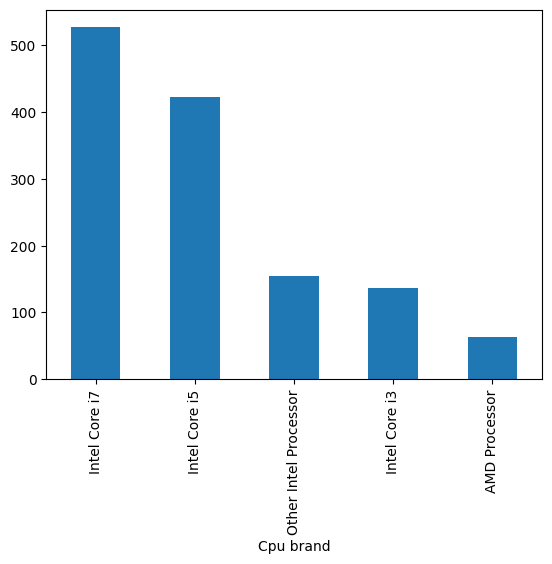

In [176]:

#Checking the value counts of all the 5 categories
df["Cpu brand"].value_counts().plot(kind="bar")
print(df["Cpu brand"].value_counts())

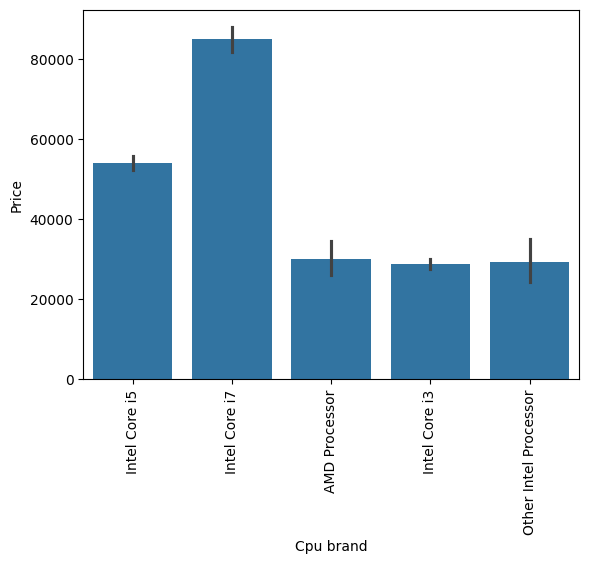

In [177]:
#Checking the average price of all the laptops Based on their categories
sns.barplot(x=df["Cpu brand"],y=df["Price"])
plt.xticks(rotation = 'vertical')
plt.show()

In [178]:

#Dropping the columns Cpu and Cpu Name
df.drop(columns=["Cpu","Cpu Name"],inplace=True)

Ram
8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

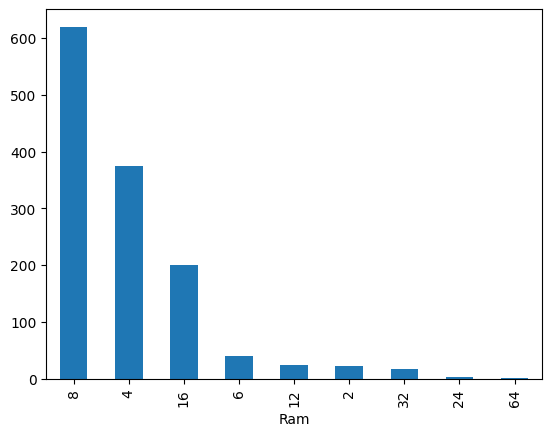

In [179]:

#Checking the different ram value_counts
df["Ram"].value_counts().plot(kind="bar")
df["Ram"].value_counts()

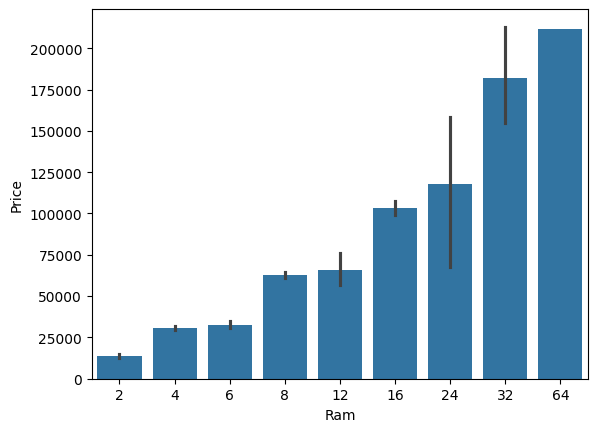

In [180]:
#Price and Ram Bar plot
sns.barplot(x=df["Ram"],y=df["Price"])
plt.show()

In [181]:

#Checking the memory column 
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [182]:
#Creating four new columns from the memory column
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].str.extract(r"(\d+)").astype(float)
df["second"] = df["second"].str.extract(r"(\d+)").astype(float)


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [183]:

#DROPing the memory column
df.drop(columns=["Memory"],inplace=True)

In [184]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0.0,128.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0.0,0.0,0.0,128.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0.0,256.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0.0,512.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0.0,256.0,0.0,0.0


In [185]:

#Dropping the Hybrid and Flash_Storage features 
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [186]:

#In GPU column we are having too many categories 
#Extracting the BrandName of the GPU
df["Gpu Brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [187]:

#Checking the number of Different Brands of GPU
df["Gpu Brand"].value_counts()

Gpu Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [188]:

#DROP the row with the Gpu ARM
df=df[df["Gpu Brand"]!="ARM"]

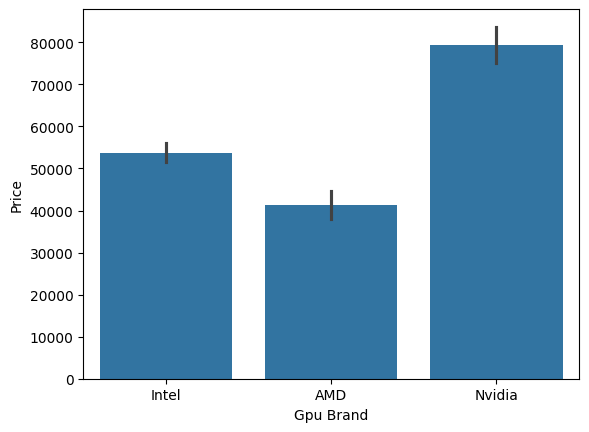

In [189]:

#Aanlysing the GPU with PRICE
sns.barplot(x=df["Gpu Brand"],y=df["Price"])
plt.show()

In [190]:

#DROP the Gpu column
df.drop(columns=["Gpu"],inplace=True)

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\1703699254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["Gpu"],inplace=True)


In [191]:

#Checking categories in OpearatingSystem
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

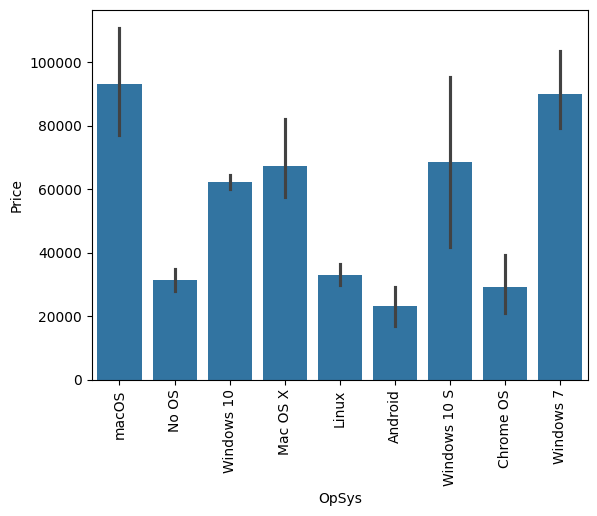

In [192]:
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [193]:
#Creating a function to reduce the categories

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [194]:

# Applying the function on OpSys feature and creating a new column name as os
df['os'] = df["OpSys"].apply(cat_os)

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\800689432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df["OpSys"].apply(cat_os)


In [195]:
#DROP the Opsys column
df.drop(columns=["OpSys"],inplace=True)

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\3479297915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["OpSys"],inplace=True)


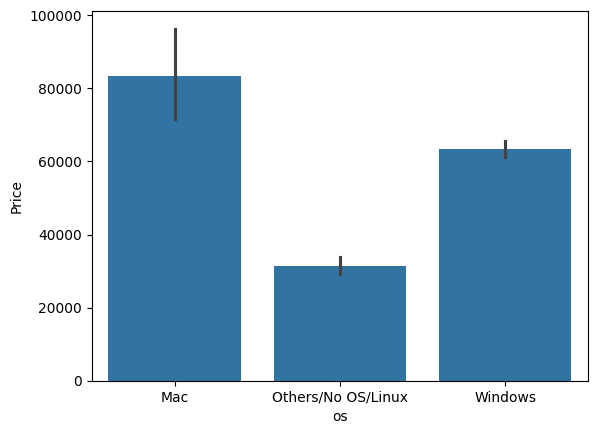

In [196]:
# Checking the price Average variation with os column
sns.barplot(x=df['os'],y=df['Price'])
plt.show()

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\2230763023.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])


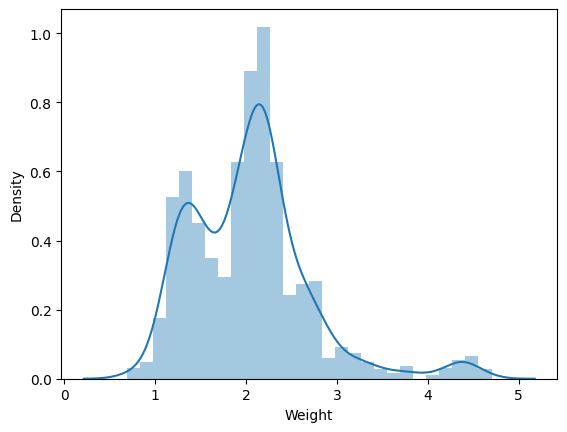

In [197]:

sns.distplot(df["Weight"])
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

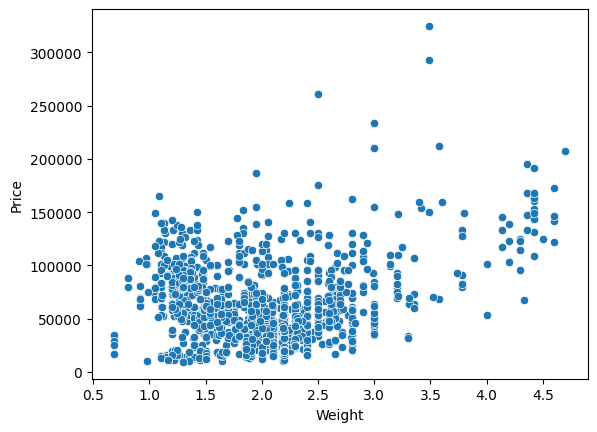

In [198]:

#Checking the scatterplot of weight and price
sns.scatterplot(x=df["Weight"],y=df["Price"])

In [112]:
sns.heatmap(df.corr())

ValueError: could not convert string to float: 'Ultrabook'

C:\Users\VISHU\AppData\Local\Temp\ipykernel_13512\2175985602.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df["Price"]))


<Axes: xlabel='Price', ylabel='Density'>

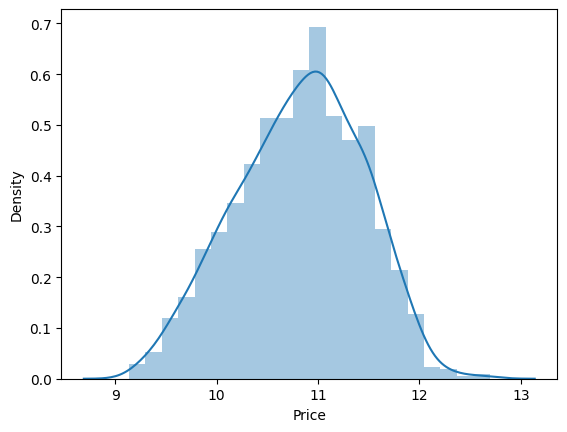

In [199]:
#Applying the log transformation on Price column to get Normal Distribution
sns.distplot(np.log(df["Price"]))

In [200]:

y = np.log(df["Price"])

In [221]:

X = df.drop(columns=["Price"])

In [222]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,128.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0.0,256.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0.0,512.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0.0,256.0,Intel,Mac


TRAIN TEST SPLIT

In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [211]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu Brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0.0,128.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000.0,128.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0.0,0.0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000.0,0.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000.0,128.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500.0,0.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0.0,512.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000.0,0.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000.0,0.0,Nvidia,Others/No OS/Linux


In [212]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [213]:
from sklearn.metrics import r2_score,mean_absolute_error


In [214]:

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

LINEAR REGRESSION

In [215]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

c:\Users\VISHU\Desktop\PROJECTS\laptopPricePrediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8073277448418629
MAE 0.21017827976428752


RIDGE REGRESSION

In [216]:
tep1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.812733103131181
MAE 0.20926802242582948


c:\Users\VISHU\Desktop\PROJECTS\laptopPricePrediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


LASSO REGRESSION

In [217]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071853945317105
MAE 0.21114361613472565


c:\Users\VISHU\Desktop\PROJECTS\laptopPricePrediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


DECISION TREE

In [218]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8447232086486273
MAE 0.17964860298443458


c:\Users\VISHU\Desktop\PROJECTS\laptopPricePrediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


RANDOM FOREST

In [219]:
step1 = ColumnTransformer(transformers =[ ('col_tnf',
                                   OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])] ,
                  remainder="passthrough") 

step2 = RandomForestRegressor()

pipe = Pipeline([
    
    ("step1",step1),
    ("step2",step2)
    
])


pipe.fit(X_train,y_train)

y_tr = pipe.predict(X_train)
y_pred = pipe.predict(X_test)


print("The R2 score is : ",r2_score(y_test,y_pred))
print("The MAE score is : ",mean_absolute_error(y_test,y_pred))

c:\Users\VISHU\Desktop\PROJECTS\laptopPricePrediction\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


The R2 score is :  0.8863487126542063
The MAE score is :  0.15418425234898758


EXPORTING THE MODEL

In [220]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))
